In [85]:
import pandas as pd
import numpy as np
import locale
import matplotlib.pyplot as plt

In [189]:
orders = pd.read_csv('/Users/arianiherrera/Downloads/Machine_Learning_Lab/data/Orders.csv')
returns = pd.read_csv('/Users/arianiherrera/Downloads/Machine_Learning_Lab/data/Returns.csv')

In [190]:
#orders = orders.convert_objects(convert_numeric=True)3

In [191]:
#locale.setlocale(locale.LC_ALL,'')
#orders['Sales']=orders.Sales.map(lambda x: locale.atof(x.strip('$')))

In [192]:
#1
orders.Sales = orders.Sales.str.replace(",",'')
orders.Profit = orders.Sales.str.replace(",",'')
orders.Sales = orders.Sales.str.replace("$",'')
orders.Profit = orders.Sales.str.replace("$",'')

orders.Sales = pd.to_numeric(orders.Sales)
orders.Profit = pd.to_numeric(orders.Profit)

In [193]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [194]:
orders['month'] = pd.DatetimeIndex(orders['Ship.Date']).month
orders['year']= pd.DatetimeIndex(orders['Ship.Date']).year

In [195]:
inventory_trends = orders.groupby('Order.Date')[["Quantity"]].sum()

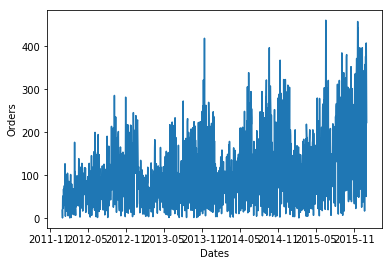

In [196]:
#2.1
plt.plot(inventory_trends)
plt.xlabel('Dates')
plt.ylabel('Orders')
plt.show()

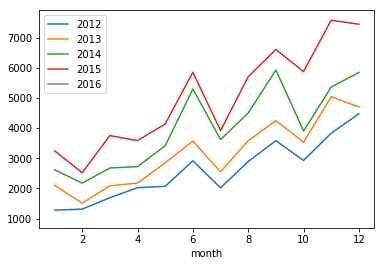

In [197]:
#2.1
for index, group in orders.groupby(['year']):
   group_agg = group.groupby(['month'])['Quantity'].sum()
   group_agg.plot(y='Quantity', label=index, legend=True)
plt.show()

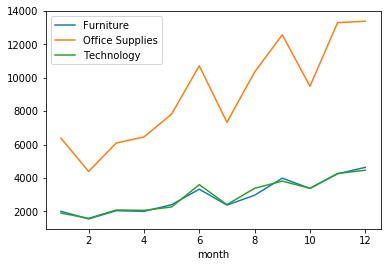

In [198]:
#2.2
for index, group in orders.groupby(['Category']):
   group_agg = group.groupby(['month'])['Quantity'].sum()
   group_agg.plot(y='Quantity', label=index, legend=True)
plt.show()

In [199]:
returns = returns.rename(columns={"Order ID": "Order.ID"})

In [200]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,month,year
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,221.98,40.77,High,11,2014
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,3709.40,923.63,Critical,2,2014
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,5175.17,915.49,Medium,10,2014
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,2892.51,910.16,Medium,1,2014
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,2832.96,903.04,Critical,11,2014


In [203]:
report = pd.merge(orders,returns, on=['Order.ID','Region'], how='outer')

In [205]:
#3.1
report.loc[report['Returned'] == 'Yes'].groupby('year')[['Profit']].sum()

,Profit
year,
2012.0,109305.49
2013.0,97563.04
2014.0,126120.42
2015.0,187360.16
2016.0,2151.81


In [206]:
#3.2
cust_returns = report.loc[report['Returned'] == 'Yes'].groupby('Customer.Name')[['Returned']].count()
cust_returns[cust_returns.Returned >= 5].count()

Returned    174
dtype: int64

In [220]:
region_returns = report.loc[report['Returned'] == 'Yes'].groupby('Region')[['Returned']].count()

In [219]:
region_returns.sort_values('Returned', ascending=[False])
#df.sort(['one'], ]}ascending=[False])
#Central America, Western Europe, Western US, Oceania most likely to return 

,Returned
Region,
Central America,248
Western Europe,233
Western US,177
Oceania,154
Southeastern Asia,140
Eastern US,134
South America,133
Eastern Asia,131
Southern Europe,112


In [227]:
#3.4
category_returns = report.loc[report['Returned'] == 'Yes'].groupby('Category')[['Returned']].count()
category_returns.sort_values('Returned', ascending=[False]).head()
#office supplies

,Returned
Category,
Office Supplies,1334
Technology,442
Furniture,426


In [228]:
subcategory_returns = report.loc[report['Returned'] == 'Yes'].groupby('Sub.Category')[['Returned']].count()
subcategory_returns.sort_values('Returned', ascending=[False]).head()
#Blinders, Art, and storage most likely to returned 

,Returned
Sub.Category,
Binders,263
Art,216
Storage,208
Paper,150
Chairs,147
